<a href="https://colab.research.google.com/github/chuviethongfpt/atom-assignments/blob/main/Home_Assignment_6_CVH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install streamlit
#!pip install pandas-profiling
#!pip install streamlit_pandas_profiling

In [134]:
import json
import requests
import sys
import os
import pandas as pd
import numpy as np
import re
from datetime import datetime as dt


#TODO1
Hoàn tất các sets bài tập trên Kaggle Data Visualization - Nếu chưa hoàn thành trong Assignment 5

In [ ]:
# Copy các link Kaggle sau:
## 1. Link tới Kaggle Account của bạn -----> 
## 2. Link tới các bài tập
## DataViz 1: ---> https://www.kaggle.com/chuviethong/exercise-hello-seaborn/edit
## DataViz 2: ---> https://www.kaggle.com/chuviethong/exercise-line-charts/edit
## DataViz 3: ---> https://www.kaggle.com/chuviethong/exercise-bar-charts-and-heatmaps/edit
## DataViz 4: ---> https://www.kaggle.com/chuviethong/exercise-scatter-plots/edit
## DataViz 5: ---> https://www.kaggle.com/chuviethong/exercise-distributions/edit
## DataViz 6: ---> https://www.kaggle.com/chuviethong/exercise-choosing-plot-types-and-custom-styles/edit
## DataViz 7: ---> https://www.kaggle.com/chuviethong/exercise-final-project/edit

#TODO3
Diagram DataCracy Slack

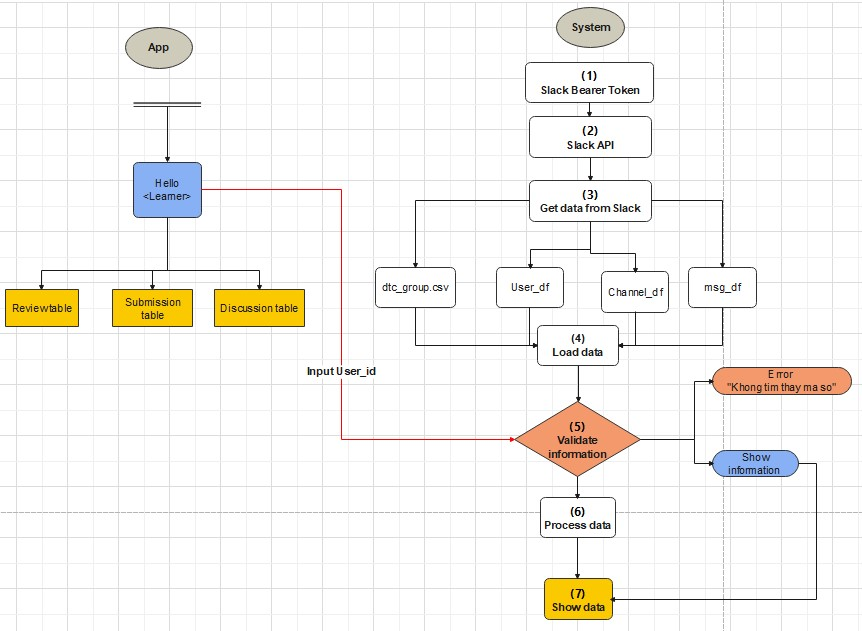

In [8]:
from IPython.display import Image
Image('Slack Diagram.jpg')


#Giải thích
Xem code của app streamlit/datacracy_slack.py:

* Trong mỗi function (steps) trong Diagram của bạn, giải thích function làm những việc gì?
* Liệt kê các logics được áp dụng để xử lý data?

**1.Trong mỗi function (steps) trong Diagram của bạn, giải thích function làm những việc gì?**

**LOAD DATA**
> * Hệ thống thực hiện load data từ các bảng user, channel, msg và cả bảng dtc_group.csv 
> * Lưu các bảng ở dạng dataframe

*Khi users vừa login vào app, hệ thống vẫn sẽ hiển thị các tables cần thiết và chưa show thông tin của learners nào (vì chưa input user_id)*

**PROCESS DATA**
> * Hệ thống vẫn thực hiện xử lý dữ và lọc dữ liệu, để xuất ra những dữ liệu cần thiết (nhưng không thực hiện validate thông tin)

**VALIDATE**
> * Hệ thống thực hiện validate thông tin users đã nhập. 

**SHOW DATA**
> * Sau khi đã xử lý dữ liệu, hệ thống show lên các bảng Submission Table, Discussion Table và Review Table
> * Nếu users input user_id --> hệ thống show thông tin cần thiết liên quan đến user_id


**2. Liệt kê các logics được áp dụng để xử lý data?**

**2.1. Table Nộp Assignment**

***Logic check channel để submit bài***

> * Assignment nào phải nộp đúng vào channel của tuần đó
> * Chỉ lấy assignment đầu tiên được gửi vào trong channel (có thể có nhiều assignment được nộp bởi 1 người)

***Logic check người nộp bài***
> * Người nộp bài có role là Learner

***Logic check ngày tháng nộp bài***

> * Ngày submit bài tập phải lớn hơn ngày tạo channel tương ứng với bài tập đó
> * Ngày submit bài tập phải nhỏ hơn ngày tạo channel cho bài tập kế tiếp

*Ví dụ*

*- Ngày submit bài assignment 3 > ngày tạo channel #atom-assignment 3 không lớn hơn 5 ngày*
(Giả thiết channel được tạo vào ngày chủ nhật => Tránh assignment 3 nộp vào #atom-assignment 2)
*- Ngày submit bài assignment 3 < ngày tạo channel #atom-assignment 4*

**2.2.Table Review Assignment**

***Logic check ngày tháng review***
> * Ngày review bài tập phải lớn hơn ngày submit bài tập

***Logic check người review***
> * Các user_id được review phải khác user_id đã nhập 

***Logic message được tính là review bài***
> * Có hashtag #review ở đầu message

**2.3. Table Discussion**
> * Các message bất kỳ ở trong các channel dù có người reply hay không vẫn tính là message discuss
> * Đếm từ trong mỗi message, không đếm icon


#TODO 4: VISUALIZATION ON STREAMLIT
Áp dụng kiến thức đã học trong TODO 1 + Pandas thực hiện các tasks sau:

1. Tổng hợp cho tất cả learners các chỉ số sau:

* Số assignment đã nộp
* % bài được review
* Số workcount đã thảo luận
* Extract thứ trong tuần (weekday) của ngày nộp bài
* Extract giờ trong ngày nộp bài (hour)

2. Vẽ biểu đồ thể hiện phân phối (Distribution - Kaggle Tutorial) của các thông số trên và add vào app Streamlit

In [194]:
!ls

 assignment_2	     python_for_data  'Slack Diagram.jpg'
 env_variable.json   sample_data


In [233]:
#load user_df
with open('./env_variable.json','r') as j:
    json_data = json.load(j)

#SLACK_BEARER_TOKEN = os.environ.get('SLACK_BEARER_TOKEN') ## Get in setting of Streamlit Share
SLACK_BEARER_TOKEN = json_data['SLACK_BEARER_TOKEN']
DTC_GROUPS_URL = ('https://raw.githubusercontent.com/anhdanggit/atom-assignments/main/data/datacracy_groups.csv')
#st.write(json_data['SLACK_BEARER_TOKEN'])

In [234]:
#From streamlit/data_glimpse.py
#LOAD DATA

def load_users_df():
    # Slack API User Data
    endpoint = "https://slack.com/api/users.list"
    headers = {"Authorization": "Bearer {}".format(json_data['SLACK_BEARER_TOKEN'])}
    response_json = requests.post(endpoint, headers=headers).json() 
    user_dat = response_json['members']

    # Convert to CSV
    user_dict = {'user_id':[],'name':[],'display_name':[],'real_name':[],'title':[],'is_bot':[]}
    for i in range(len(user_dat)):
        user_dict['user_id'].append(user_dat[i]['id'])
        user_dict['name'].append(user_dat[i]['name'])
        user_dict['display_name'].append(user_dat[i]['profile']['display_name'])
        user_dict['real_name'].append(user_dat[i]['profile']['real_name_normalized'])
        user_dict['title'].append(user_dat[i]['profile']['title'])
        user_dict['is_bot'].append(int(user_dat[i]['is_bot']))
    user_df = pd.DataFrame(user_dict) 
    # Read dtc_group hosted in github
    dtc_groups = pd.read_csv(DTC_GROUPS_URL)
    user_df = user_df.merge(dtc_groups, how='left', on='name')
    return user_df


def load_channel_df():
    endpoint2 = "https://slack.com/api/conversations.list"
    data = {'types': 'public_channel,private_channel'} # -> CHECK: API Docs https://api.slack.com/methods/conversations.list/test
    headers = {"Authorization": "Bearer {}".format(SLACK_BEARER_TOKEN)}
    response_json = requests.post(endpoint2, headers=headers, data=data).json() 
    channel_dat = response_json['channels']
    channel_dict = {'channel_id':[], 'channel_name':[], 'is_channel':[],'creator':[],'created_at':[],'topics':[],'purpose':[],'num_members':[]}
    for i in range(len(channel_dat)):
        channel_dict['channel_id'].append(channel_dat[i]['id'])
        channel_dict['channel_name'].append(channel_dat[i]['name'])
        channel_dict['is_channel'].append(channel_dat[i]['is_channel'])
        channel_dict['creator'].append(channel_dat[i]['creator'])
        channel_dict['created_at'].append(dt.fromtimestamp(float(channel_dat[i]['created'])))
        channel_dict['topics'].append(channel_dat[i]['topic']['value'])
        channel_dict['purpose'].append(channel_dat[i]['purpose']['value'])
        channel_dict['num_members'].append(channel_dat[i]['num_members'])
    channel_df = pd.DataFrame(channel_dict) 
    return channel_df


def load_msg_dict():
    endpoint3 = "https://slack.com/api/conversations.history"
    headers = {"Authorization": "Bearer {}".format(SLACK_BEARER_TOKEN)}
    msg_dict = {'channel_id':[],'msg_id':[], 'msg_ts':[], 'user_id':[], 'latest_reply':[],'reply_user_count':[],'reply_users':[],'github_link':[],'text':[]}
    for channel_id, channel_name in zip(channel_df['channel_id'], channel_df['channel_name']):
        print('Channel ID: {} - Channel Name: {}'.format(channel_id, channel_name))
        try:
            data = {"channel": channel_id} 
            response_json = requests.post(endpoint3, data=data, headers=headers).json()
            msg_ls = response_json['messages']
            for i in range(len(msg_ls)):
                if 'client_msg_id' in msg_ls[i].keys():
                    msg_dict['channel_id'].append(channel_id)
                    msg_dict['msg_id'].append(msg_ls[i]['client_msg_id'])
                    msg_dict['msg_ts'].append(dt.fromtimestamp(float(msg_ls[i]['ts'])))
                    msg_dict['latest_reply'].append(dt.fromtimestamp(float(msg_ls[i]['latest_reply'] if 'latest_reply' in msg_ls[i].keys() else 0))) ## -> No reply: 1970-01-01
                    msg_dict['user_id'].append(msg_ls[i]['user'])
                    msg_dict['reply_user_count'].append(msg_ls[i]['reply_users_count'] if 'reply_users_count' in msg_ls[i].keys() else 0)
                    msg_dict['reply_users'].append(msg_ls[i]['reply_users'] if 'reply_users' in msg_ls[i].keys() else 0) 
                    msg_dict['text'].append(msg_ls[i]['text'] if 'text' in msg_ls[i].keys() else 0) 
                    ## -> Censor message contains tokens
                    text = msg_ls[i]['text']
                    github_link = re.findall('(?:https?://)?(?:www[.])?github[.]com/[\w-]+/?', text)
                    msg_dict['github_link'].append(github_link[0] if len(github_link) > 0 else None)
        except:
            print('====> '+ str(response_json))
    msg_df = pd.DataFrame(msg_dict)
    return msg_df

def process_msg_data(msg_df, user_df, channel_df):
    ## Extract 2 reply_users
    msg_df['reply_user1'] = msg_df['reply_users'].apply(lambda x: x[0] if x != 0 else '')
    msg_df['reply_user2'] = msg_df['reply_users'].apply(lambda x: x[1] if x != 0 and len(x) > 1 else '')
    ## Merge to have a nice name displayed
    msg_df = msg_df.merge(user_df[['user_id','name','DataCracy_role']].rename(columns={'name':'submit_name'}), \
        how='left',on='user_id')
    msg_df = msg_df.merge(user_df[['user_id','name']].rename(columns={'name':'reply1_name','user_id':'reply1_id'}), \
        how='left', left_on='reply_user1', right_on='reply1_id')
    msg_df = msg_df.merge(user_df[['user_id','name']].rename(columns={'name':'reply2_name','user_id':'reply2_id'}), \
        how='left', left_on='reply_user2', right_on='reply2_id')
    ## Merge for nice channel name
    msg_df = msg_df.merge(channel_df[['channel_id','channel_name','created_at']], how='left',on='channel_id')
    ## Format datetime cols
    msg_df['created_at'] = msg_df['created_at'].dt.strftime('%Y-%m-%d')
    msg_df['msg_date'] = msg_df['msg_ts'].dt.strftime('%Y-%m-%d')
    msg_df['msg_time'] = msg_df['msg_ts'].dt.strftime('%H:%M')
    msg_df['msg_weekday'] = msg_df['msg_ts'].dt.strftime('%w')
    msg_df['msg_hour'] = msg_df['msg_ts'].dt.strftime('%H')
    msg_df['wordcount'] = msg_df.text.apply(lambda s: len(s.split()))
    return msg_df



In [235]:
#PROCESS DATA
def submission(msg_df, user_id):
    
    ## Submission
    submit_df = msg_df[msg_df.channel_name.str.contains('assignment')]
    submit_df = submit_df[submit_df.DataCracy_role.str.contains('Learner')]
    submit_df = submit_df[submit_df.user_id == user_id]
    latest_ts = submit_df.groupby(['channel_name', 'user_id']).msg_ts.idxmax() ## -> Latest ts
    submit_df = submit_df.loc[latest_ts]
    dis_cols1 = ['channel_name', 'created_at','msg_date','msg_weekday','msg_time','msg_hour','reply_user_count', 'reply1_name']
    return(submit_df[dis_cols1])

def review(msg_df, user_id):
    
    # Review
    review_df = msg_df[msg_df.user_id != user_id] ##-> Remove the case self-reply
    review_df = msg_df[msg_df.channel_name.str.contains('assignment')]
    review_df = review_df[review_df.DataCracy_role.str.contains('Learner')]

    dis_cols2 = ['channel_name', 'created_at','msg_date','msg_time','reply_user_count','submit_name']
    return(review_df [dis_cols2])

def discussion(msg_df):
    
    ## Discussion
    discuss_df = msg_df[msg_df.channel_name.str.contains('discuss')]
    discuss_df = discuss_df.sort_values(['msg_date','msg_time'])
    dis_cols3 = ['channel_name','msg_date', 'msg_time','wordcount','reply_user_count','reply1_name']
    return(discuss_df[dis_cols3])
    

In [236]:
#PROCESS DATA
def process(msg_df, user_id):
    #Validate messages
    process1_df = msg_df[(msg_df.user_id == user_id) | (msg_df.reply_user1 == user_id) | (msg_df.reply_user2 == user_id)]

    submit_df = submission(process1_df, user_id)
    review_df = review(process1_df, user_id)
    discuss_df = discussion(process1_df)
    process2_df = process1_df[process1_df['user_id'] ==  user_id].head(1)[['user_id','submit_name', 'DataCracy_role']]

  #Số assignment đã nộp
    count_submit = len(submit_df)
    process2_df['count_submit'] = count_submit
  #% bài được review
    percentage_rv = round(100 * len(submit_df[submit_df.reply_user_count > 0])/count_submit if count_submit > 0  else 0, 2)
    process2_df['percentage_rv'] = percentage_rv
  #Số workcount đã thảo luận
    word_count = round(sum(discuss_df['wordcount']),2)
    process2_df['word_count'] = word_count
  #Extract thứ trong tuần (weekday) của ngày nộp bài
    weekday =round(submit_df['msg_weekday'].astype('int32').mean(),2)
    process2_df['weekday'] = weekday
  #Extract giờ trong ngày nộp bài (hour)
    hour = round(submit_df['msg_hour'].astype('int32').mean(),2)
    process2_df['hour'] = hour


    return (process2_df)

In [237]:
#SHOW DATA
# Table data
user_df = load_users_df()
channel_df = load_channel_df()
msg_df = load_msg_dict()
msg_df = process_msg_data(msg_df, user_df, channel_df)

Channel ID: C01B4PVGLVB - Channel Name: general
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01BYH7JHB5 - Channel Name: contents
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01CAMNCJJV - Channel Name: branding-design
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C01U6P7LZ8F - Channel Name: atom-assignment1
Channel ID: C01UL6K1C7L - Channel Name: atom-week1
Channel ID: C01ULCHGN75 - Channel Name: atom-general
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C020VMT58JK - Channel Name: topics-data-analytics
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C0213MNH9L6 - Channel Name: topics-python
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C0213N56M2A - Channel Name: topics-materials
====> {'ok': False, 'error': 'not_in_channel'}
Channel ID: C021FSDN7LJ - Channel Name: atom-assignment2
Channel ID: C021KLB0DSB - Channel Name: discuss-group3
Channel ID: C021KLB90GP - Channel Name: discuss-group4
Channel ID: C0220

In [238]:
data_df = pd.DataFrame()

for user_id in msg_df[msg_df['DataCracy_role'].str.contains('Learner') & msg_df['channel_name'].str.contains('assignment')]['user_id'].unique():
    
    process2_df = process(msg_df, user_id)
    data_df = data_df.append(process2_df, ignore_index=True)
data_df.head(11)

,user_id,submit_name,DataCracy_role,count_submit,percentage_rv,word_count,weekday,hour
0,U01UTGRMGEQ,hanh.nguyenhong2511,Learner_Gr4,5,60.00,95,2.00,11.00
1,U01UJ9LG5U5,danhpcv,Learner_Gr3,5,60.00,127,2.40,7.60
2,U01UMC08KL2,auslyn.nguyen,Learner_Gr4,1,100.00,0,1.00,4.00
3,U01UTGRQS9J,vukhanhlinh.3526,Learner_Gr4,3,100.00,0,3.67,11.67
4,U01UMJ36QD9,tranquan030894,Learner_Gr4,6,83.33,248,3.67,13.17
5,U01UMC0N5U2,chuviethong.vn,Learner_Gr1,4,75.00,393,5.25,9.50
6,U01USGKQ771,trang.ngo1709,Learner_Gr1,5,60.00,0,3.20,15.20
7,U01UTGVPE7N,phuonghoaiftu2.k55,Learner_Gr3,4,50.00,223,4.00,14.75
8,U01U6JQB695,thgiang.phan,Learner_Gr1,4,100.00,29,3.75,7.00
9,U01V00KHHHP,phuongttn50.hrc,Learner_Gr3,5,80.00,89,4.60,14.40


In [240]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


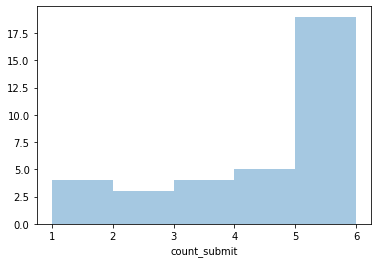

In [247]:
sns.distplot(a=data_df['count_submit'], label="Benign", kde=False)# Histograms for benign and maligant tumors

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


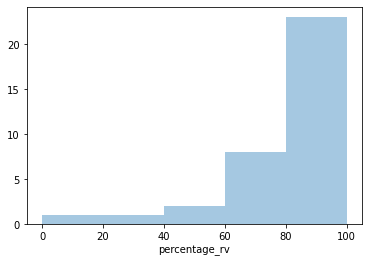

In [246]:
sns.distplot(a=data_df['percentage_rv'], label="Benign", kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


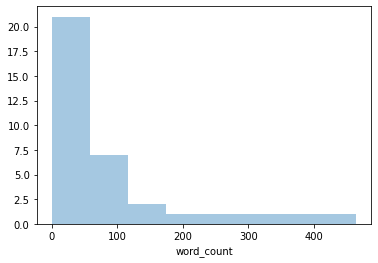

In [248]:
sns.distplot(a=data_df['word_count'], label="Benign", kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


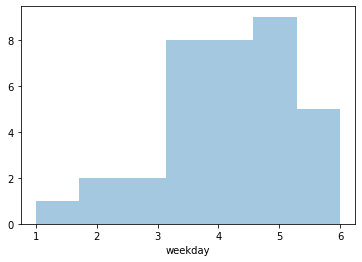

In [251]:
sns.distplot(a=data_df['weekday'], label="Benign", kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


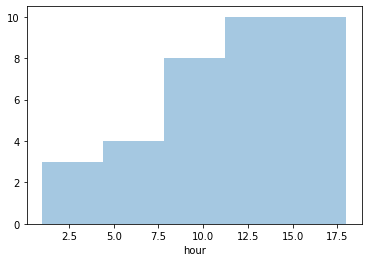

In [253]:
sns.distplot(a=data_df['hour'], label="Begin", kde=False)